# Abalone Data 사용하여 머신러닝 회귀하기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [5]:
# csv 파일 불러오기
df = pd.read_csv("/Users/user/Downloads/abalone.csv", index_col = 0)

In [7]:
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

In [9]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [11]:
# 결측치 확인
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [13]:
# 결측치 제거
df = df.dropna()

In [15]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Whole weight'}>,
        <Axes: title={'center': 'Shucked weight'}>,
        <Axes: title={'center': 'Viscera weight'}>],
       [<Axes: title={'center': 'Shell weight'}>,
        <Axes: title={'center': 'Rings'}>, <Axes: >]], dtype=object)

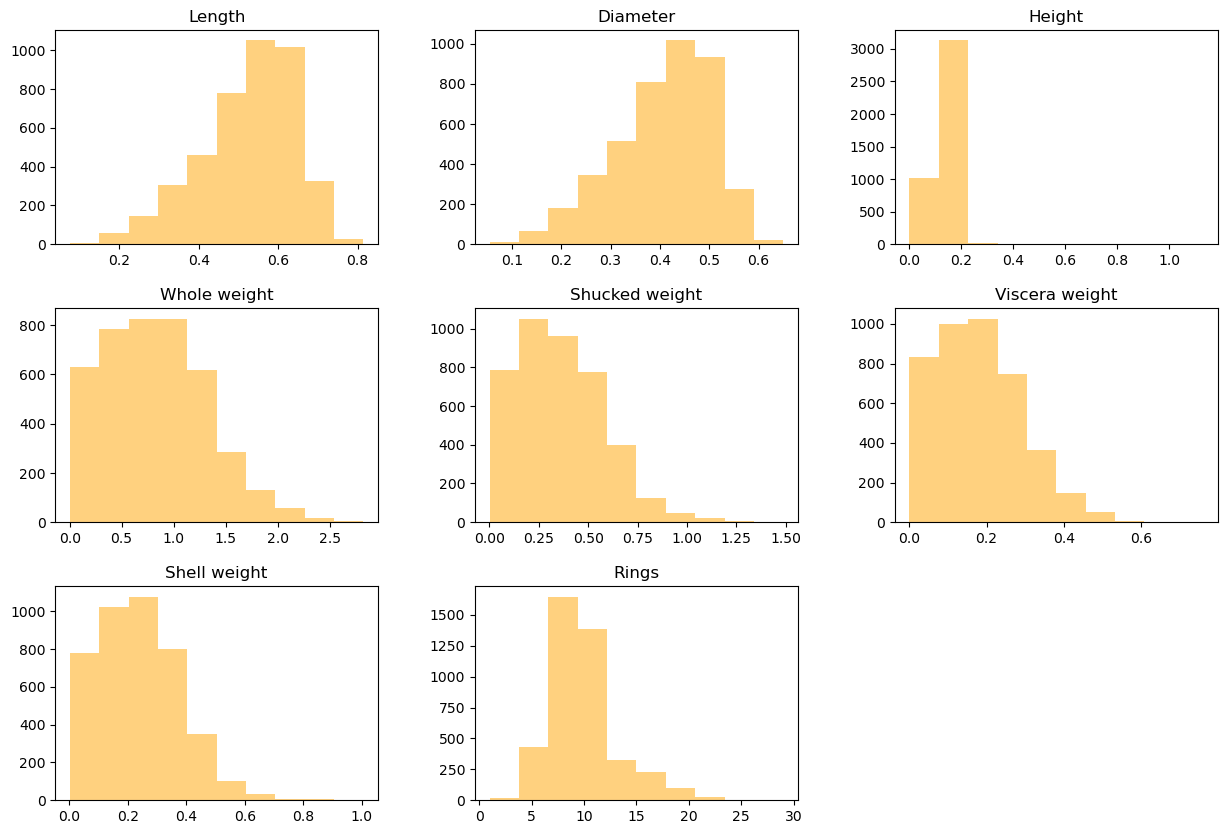

In [19]:
df.hist(figsize=(15, 10), grid=False, alpha=0.5, color='orange')

In [21]:
#레이블을 숫자로 변환
from sklearn.preprocessing import StandardScaler, LabelEncoder

# LabelEncoder 객체 생성
label = LabelEncoder()

# 문자로 지정된 열의 데이터에 대해 LabelEncoder를 적용하여 변환
df['Sex'] = label.fit_transform(df['Sex'])

df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
id,,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


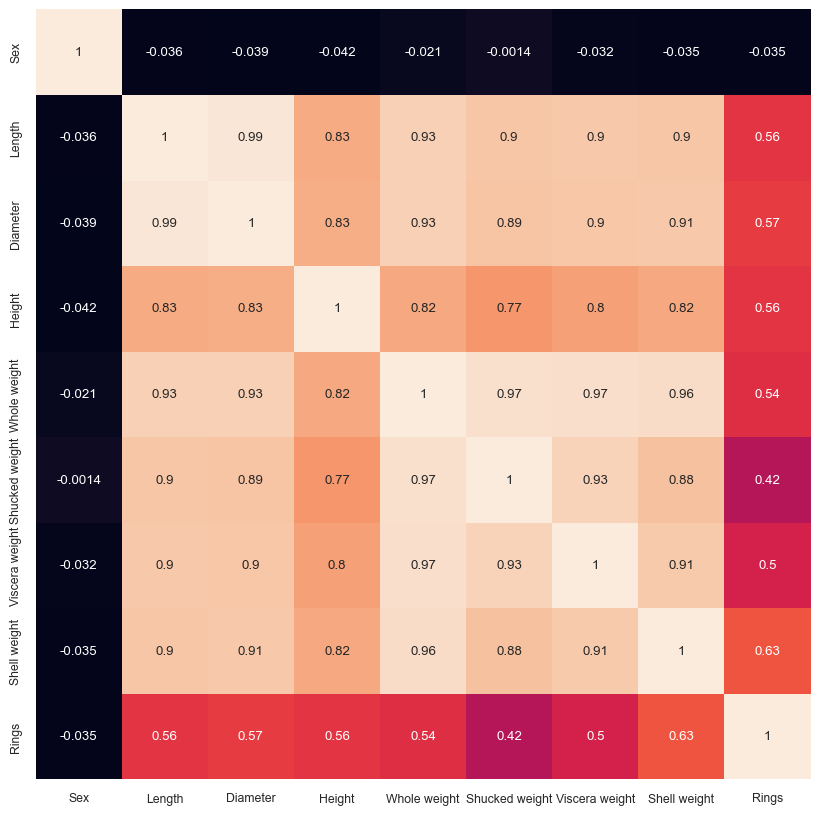

In [23]:
df_corr = df[[ 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']]

#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df_corr.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [25]:
# 데이터 증강 Rings=0, Rings=28
import pandas as pd

# 기존 abalone 데이터셋 로드
# 데이터가 abalone.csv 파일에 있다고 가정

# rings=1인 데이터와 rings=29인 데이터 추출
rings_1_data = df[df['Rings'] == 1].copy()
rings_29_data = df[df['Rings'] == 29].copy()

# rings=1인 데이터를 rings=0으로 변경
rings_1_data['Rings'] = 0

# rings=29인 데이터를 rings=28로 변경
rings_29_data['Rings'] = 28

# 기존 데이터에 rings=0과 rings=28 데이터를 추가
df = pd.concat([df, rings_1_data, rings_29_data], ignore_index=True)

# 추가된 데이터 확인
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
0       1
28      1
Name: count, dtype: int64

## Train Test Spilt

In [28]:
X=df.drop(['Sex', 'Rings'], axis=1)

X.head()
# head()는 첫 5행만 출력함.

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [30]:
y=df['Rings']
y.value_counts().sort_index(ascending=True)

Rings
0       1
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
28      1
29      1
Name: count, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)

X_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
3143,0.200,0.150,0.040,0.0460,0.0210,0.0070,0.0065
1783,0.525,0.380,0.125,0.6500,0.3030,0.1550,0.1590
2368,0.720,0.595,0.225,1.9690,0.8045,0.4230,0.6600
2617,0.670,0.520,0.190,1.6385,0.8115,0.3690,0.3910
4060,0.545,0.405,0.130,0.6580,0.3270,0.1445,0.1740
...,...,...,...,...,...,...,...
3916,0.520,0.410,0.160,0.7120,0.2845,0.1530,0.2250
1283,0.500,0.375,0.145,0.5795,0.2390,0.1375,0.1850
3714,0.725,0.560,0.185,1.7920,0.8730,0.3670,0.4350
3325,0.345,0.265,0.090,0.1630,0.0615,0.0370,0.0485


In [35]:
# Scale X, 피쳐 값을 정규화 한것과 하지 않은 것을 비교해보자.
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [39]:
X_test


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,-1.124320,-0.995194,-1.277113,-0.996864,-0.809105,-1.018471,-1.152305
1,0.302631,0.376572,1.300133,0.313692,-0.244651,0.396151,0.695334
2,1.687612,1.443501,1.885871,2.512011,1.887984,2.367496,3.004882
3,-2.131579,-2.163736,-1.628556,-1.486522,-1.421356,-1.488491,-1.462651
4,0.134754,0.122541,0.011510,-0.048408,0.046680,-0.078432,-0.206834
...,...,...,...,...,...,...,...
1375,-1.627949,-1.858899,-1.511409,-1.319874,-1.202857,-1.292269,-1.415738
1376,0.218692,0.427378,0.362952,-0.080298,-0.071673,-0.201641,0.081860
1377,0.260661,0.274959,-0.105638,0.060633,0.083096,-0.206204,0.370553
1378,1.058075,0.986246,0.597247,0.681965,0.545129,0.847918,0.796376


### SVM

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [46]:
# SVR 모델 학습
rg_svm = SVR() # Support Vector Regression
rg_svm.fit(X_train, y_train) # X_train(학습데이터)과 y_train(레이블)으로 학습

# 모델 점수 (R^2)
print('--- SVR 모델점수 (R²) ---\n', '{:.5f}'.format(rg_svm.score(X_test, y_test)))

# 테스트 데이터로 예측
pred_svm = rg_svm.predict(X_test)

# 성능 지표 계산
mse = mean_squared_error(pred_svm, y_test)
mae = mean_absolute_error(pred_svm, y_test)

# 결과 출력
print('\n--- MSE (Mean Squared Error) ---')
print('{:.5f}'.format(mse))

print('\n--- MAE (Mean Absolute Error) ---')
print('{:.5f}'.format(mae))

--- SVR 모델점수 (R²) ---
 0.54374

--- MSE (Mean Squared Error) ---
4.60177

--- MAE (Mean Absolute Error) ---
1.46696


### Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

rg_lr = LinearRegression()
rg_lr.fit(X_train, y_train)

print('--- LR 모델점수 ---\n', '{:.5f}'.format(rg_lr.score(X_test, y_test)))

pred_lr = rg_lr.predict(X_test)

mse = mean_squared_error(pred_lr, y_test)
mae = mean_absolute_error(pred_lr, y_test)
print('\n--- MSE ---')
print('{:.5f}'.format(mse))
print('\n--- MAE ---')
print('{:.5f}'.format(mae))

--- LR 모델점수 ---
 0.53333

--- MSE ---
4.70674

--- MAE ---
1.58050


### Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor

rg_rf = RandomForestRegressor(random_state=5)
rg_rf.fit(X_train, y_train)

print('--- RF 모델점수 ---\n', '{:.5f}'.format(rg_rf.score(X_test, y_test)))

pred_rf = rg_rf.predict(X_test)

mse = mean_squared_error(pred_rf, y_test)
mae = mean_absolute_error(pred_rf, y_test)
print('\n--- MSE ---')
print('{:.5f}'.format(mse))
print('\n--- MAE ---')
print('{:.5f}'.format(mae))

--- RF 모델점수 ---
 0.51440

--- MSE ---
4.89771

--- MAE ---
1.56926


### Decision Tree

In [55]:
from sklearn.tree import DecisionTreeRegressor
# Build a decision tree classifier and predict

rg_dt = DecisionTreeRegressor(random_state=12)
rg_dt.fit(X_train, y_train)

print('--- RF 모델점수 ---\n', '{:.5f}'.format(rg_dt.score(X_test, y_test)))

pred_dt = rg_dt.predict(X_test)

mse = mean_squared_error(pred_dt, y_test)
mae = mean_absolute_error(pred_dt, y_test)
print('\n--- MSE ---')
print('{:.5f}'.format(mse))
print('\n--- MAE ---')
print('{:.5f}'.format(mae))

--- RF 모델점수 ---
 0.06065

--- MSE ---
9.47409

--- MAE ---
2.11123
